In [29]:
# Importing Dependencies
import pandas as pd
import json
import tweepy
import matplotlib.pyplot as plt
import numpy as np 
from datetime import datetime
#import and initialize Vader Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [14]:
# Import twitter API keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [15]:
# Twitter Credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [65]:
# Target terms
target_terms = '@facebook'

In [17]:
# Get all tweets from home page
#public_tweets = api.search(target_terms, count=100, result_type = "recent")

In [21]:
tweets_text=[]
tweets_date=[]
sentiments = []
counter = 1

#tweet_createdat=[]
# loop through all tweets
for x in range(1,201):
    # Get all tweets from target user
    public_tweets = api.user_timeline(target_terms, page = x)
    
    # loop through all tweets
    for tweet in public_tweets:
        tweet_text = tweet["text"]
        tweet_createdat = tweet["created_at"]
        #Pretty print in JSON
        #print(json.dumps([tweet_text,tweet_createdat], indent = 4, sort_keys = True))
        #print(tweet_text)
        tweets_text.append(tweet['text'])
        tweets_date.append(tweet['created_at'])
        
        # Doing the Vader Analysis on the tweets
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Adding Sentiments for each tweet into a list
        sentiments.append({"Date": tweet['created_at'],
                           "Tweet Text": tweet["text"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets Ago":counter
                          })
        
        # Incrementing Counter
        counter += 1
        

In [22]:
len(sentiments)

3222

In [64]:
df = pd.DataFrame(sentiments)
df.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago
0,0.8442,Tue Jun 19 21:15:16 +0000 2018,0.000,0.698,0.302,RT @DarkHorseComics: Have the courage to seek ...,1
1,0.6705,Tue Jun 19 18:01:18 +0000 2018,0.000,0.756,0.244,RT @NintendoVS: Mario is a well-rounded fighte...,2
2,-0.3561,Tue Jun 19 17:30:06 +0000 2018,0.125,0.813,0.062,Don't miss out! Save up to 50% on select #Nint...,3
3,0.0000,Tue Jun 19 17:00:07 +0000 2018,0.000,1.000,0.000,RT @RocketLeague: The Jurassic World Car Pack ...,4
4,0.7003,Tue Jun 19 16:30:22 +0000 2018,0.000,0.702,0.298,"In #MarioTennis Aces, your quest to save Luigi...",5


In [25]:
df.to_csv("@facebook.csv")

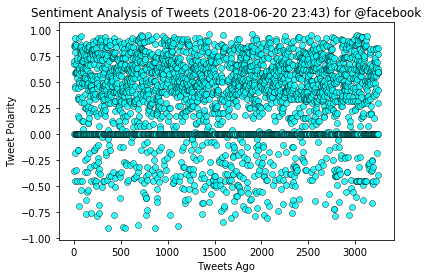

In [66]:
# Create plot
x_val = df["Tweets Ago"]
y_val = df["Compound"]
plt.scatter(x_val, y_val, alpha = 0.8,color = "cyan", edgecolor = "black", marker = "o",
           label = "tweets", linewidth=0.5)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_terms}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("facebook_sensitivity_analysis.png")
plt.show()

In [33]:
# Average Polarity scores for '@facebook' handle
print(f"User: {target_terms}")
print(f"Compound: {np.mean(compound):.3f}")
print(f"Positive: {np.mean(pos):.3f}")
print(f"Neutral: {np.mean(neu):.3f}")
print(f"Negative: {np.mean(neg):.3f}")


User: @facebook
Compound: 0.612
Positive: 0.227
Neutral: 0.773
Negative: 0.000


In [73]:
# Target terms for the handle '@facebooknewsroom'
target_terms = '@fbnewsroom'

In [37]:
tweets_text=[]
tweets_date=[]
sentiments = []
counter = 1

#tweet_createdat=[]
# loop through all tweets
for x in range(1,201):
    # Get all tweets from target user
    public_tweets = api.user_timeline(target_terms, page = x)
    
    # loop through all tweets
    for tweet in public_tweets:
        tweet_text = tweet["text"]
        tweet_createdat = tweet["created_at"]
        #Pretty print in JSON
        #print(json.dumps([tweet_text,tweet_createdat], indent = 4, sort_keys = True))
        #print(tweet_text)
        tweets_text.append(tweet['text'])
        tweets_date.append(tweet['created_at'])
        
        # Doing the Vader Analysis on the tweets
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Adding Sentiments for each tweet into a list
        sentiments.append({"Date": tweet['created_at'],
                           "Tweet Text": tweet["text"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets Ago":counter
                          })
        
        # Incrementing Counter
        counter += 1
        

In [38]:
df1= pd.DataFrame(sentiments)
df1.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago
0,0.0000,Wed May 23 17:00:35 +0000 2018,0.000,1.000,0.000,Facing Facts https://t.co/YnpWN0NVTW,1
1,-0.5994,Wed May 23 17:00:30 +0000 2018,0.495,0.505,0.000,Facing Facts: Facebook’s Fight Against Misinfo...,2
2,-0.2500,Wed May 23 17:00:07 +0000 2018,0.273,0.727,0.000,Hard Questions: What’s Facebook’s Strategy for...,3
3,0.6808,Wed May 23 16:00:31 +0000 2018,0.000,0.616,0.384,New Tools to Support Group Admins and Keep Com...,4
4,0.0000,Wed May 23 13:00:47 +0000 2018,0.000,1.000,0.000,Find Home Service Professionals with Marketpla...,5


In [39]:
df1.to_csv("@fbnewsroom.csv")

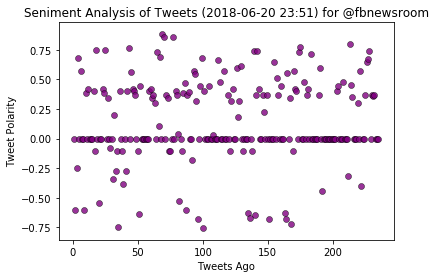

In [75]:
# Create plot
x_val = df1["Tweets Ago"]
y_val = df1["Compound"]
plt.scatter(x_val, y_val, alpha = 0.8,color = "purple", edgecolor = "black", marker = "o",
           label = "tweets", linewidth=0.5)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Seniment Analysis of Tweets ({now}) for {target_terms}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("facebook_sensitivity_analysis_fbnewsroom.png")

plt.show()

In [42]:
# Average Polarity scores for '@facebooknewsroom' handle
print(f"User: {target_terms}")
print(f"Compound: {np.mean(compound):.3f}")
print(f"Positive: {np.mean(pos):.3f}")
print(f"Neutral: {np.mean(neu):.3f}")
print(f"Negative: {np.mean(neg):.3f}")


User: @fbnewsroom
Compound: 0.000
Positive: 0.000
Neutral: 1.000
Negative: 0.000


In [76]:
# Target terms for the handle '@mindbodyonline'
target_terms = '@mindbodyonline'

In [44]:
tweets_text=[]
tweets_date=[]
sentiments = []
counter = 1

#tweet_createdat=[]
# loop through all tweets
for x in range(1,201):
    # Get all tweets from target user
    public_tweets = api.user_timeline(target_terms, page = x)
    
    # loop through all tweets
    for tweet in public_tweets:
        tweet_text = tweet["text"]
        tweet_createdat = tweet["created_at"]
        #Pretty print in JSON
        #print(json.dumps([tweet_text,tweet_createdat], indent = 4, sort_keys = True))
        #print(tweet_text)
        tweets_text.append(tweet['text'])
        tweets_date.append(tweet['created_at'])
        
        # Doing the Vader Analysis on the tweets
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Adding Sentiments for each tweet into a list
        sentiments.append({"Date": tweet['created_at'],
                           "Tweet Text": tweet["text"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets Ago":counter
                          })
        
        # Incrementing Counter
        counter += 1

In [45]:
df2= pd.DataFrame(sentiments)
df2.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago
0,0.2714,Tue Jun 19 01:00:01 +0000 2018,0.0,0.793,0.207,#Selflove is important. Tell us how you practi...,1
1,0.1779,Mon Jun 18 21:58:02 +0000 2018,0.0,0.856,0.144,Want to create a #rewardsprogram for your busi...,2
2,0.8653,Mon Jun 18 11:00:59 +0000 2018,0.0,0.628,0.372,@cschwab24 Hello Chris and thank you for reach...,3
3,0.9022,Sun Jun 17 19:04:28 +0000 2018,0.0,0.448,0.552,"May your day be filled with #dadjokes, laughte...",4
4,0.5106,Fri Jun 15 19:34:15 +0000 2018,0.0,0.798,0.202,@Hannah_Arnold1 Hello Hannah. Thank you for re...,5


In [46]:
df2.to_csv("@mindbodyonline.csv")

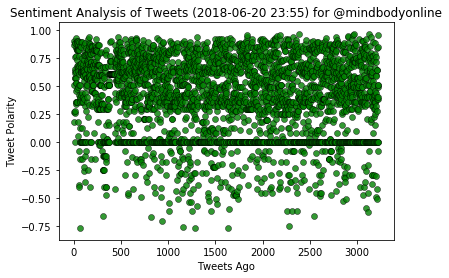

In [77]:
# Create plot
x_val = df2["Tweets Ago"]
y_val = df2["Compound"]
plt.scatter(x_val, y_val, alpha = 0.8,color = "green", edgecolor = "black", marker = "o",
           label = "tweets", linewidth=0.5)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_terms}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("mindbody_sensitivity_analysis.png")
plt.show()


In [48]:
# Average Polarity scores for '@mindbodyonline' handle
print(f"User: {target_terms}")
print(f"Compound: {np.mean(compound):.3f}")
print(f"Positive: {np.mean(pos):.3f}")
print(f"Neutral: {np.mean(neu):.3f}")
print(f"Negative: {np.mean(neg):.3f}")


User: @mindbodyonline
Compound: 0.959
Positive: 0.577
Neutral: 0.423
Negative: 0.000


In [78]:
# Target terms for the handle '@NintendoAmerica'
target_terms = '@NintendoAmerica'

In [50]:
tweets_text=[]
tweets_date=[]
sentiments = []
counter = 1

#tweet_createdat=[]
# loop through all tweets
for x in range(1,201):
    # Get all tweets from target user
    public_tweets = api.user_timeline(target_terms, page = x)
    
    # loop through all tweets
    for tweet in public_tweets:
        tweet_text = tweet["text"]
        tweet_createdat = tweet["created_at"]
        #Pretty print in JSON
        #print(json.dumps([tweet_text,tweet_createdat], indent = 4, sort_keys = True))
        #print(tweet_text)
        tweets_text.append(tweet['text'])
        tweets_date.append(tweet['created_at'])
        
        # Doing the Vader Analysis on the tweets
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Adding Sentiments for each tweet into a list
        sentiments.append({"Date": tweet['created_at'],
                           "Tweet Text": tweet["text"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets Ago":counter
                          })
        
        # Incrementing Counter
        counter += 1

In [51]:
df3= pd.DataFrame(sentiments)
df3.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago
0,0.8442,Tue Jun 19 21:15:16 +0000 2018,0.000,0.698,0.302,RT @DarkHorseComics: Have the courage to seek ...,1
1,0.6705,Tue Jun 19 18:01:18 +0000 2018,0.000,0.756,0.244,RT @NintendoVS: Mario is a well-rounded fighte...,2
2,-0.3561,Tue Jun 19 17:30:06 +0000 2018,0.125,0.813,0.062,Don't miss out! Save up to 50% on select #Nint...,3
3,0.0000,Tue Jun 19 17:00:07 +0000 2018,0.000,1.000,0.000,RT @RocketLeague: The Jurassic World Car Pack ...,4
4,0.7003,Tue Jun 19 16:30:22 +0000 2018,0.000,0.702,0.298,"In #MarioTennis Aces, your quest to save Luigi...",5


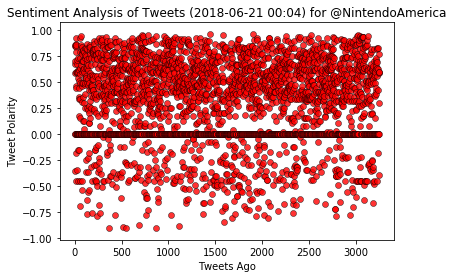

In [80]:
df3.to_csv("@NintendoAmerica.csv")# Create plot
x_val = df3["Tweets Ago"]
y_val = df3["Compound"]
plt.scatter(x_val, y_val, alpha = 0.8,color = "red", edgecolor = "black", marker = "o",
           label = "tweets", linewidth=0.5)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_terms}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("nintendo_sensitivity_analysis.png")
plt.show()

In [53]:
# Average Polarity scores for '@mindbodyonline' handle
print(f"User: {target_terms}")
print(f"Compound: {np.mean(compound):.3f}")
print(f"Positive: {np.mean(pos):.3f}")
print(f"Neutral: {np.mean(neu):.3f}")
print(f"Negative: {np.mean(neg):.3f}")


User: @NintendoAmerica
Compound: 0.296
Positive: 0.109
Neutral: 0.891
Negative: 0.000


In [ ]:
consolidated_df = pd.DataFrame()